In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import re
import scipy
import scipy.stats as stats
from scipy.stats import f
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_params
from statsmodels.iolib.summary2 import summary_col
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import patsy
import statsmodels.stats.api as sms 
from scipy.stats import chi2 

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/EMR-Python/emr-hw-mgimomeo/main/student-mat.csv?token=GHSAT0AAAAAACCWQRCAXTYHZOXSJ2C3EXMKZDDH5MQ')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Описание датасета

**school** - school attended by students (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

**sex** - student's sex (binary: 'F' - female or 'M' - male)

**age** - student's age (numeric: as we shall see, it contains values from 16 to 22)

**address** - student's home address type, area where the student lives (binary: 'U' - urban or 'R' - rural)

**famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

**Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

**Medu** - mother's education (ordinal categorical value between 0 and 4: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    
**Fedu** - father's education (ordinal categorical value between 0 and 4: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    
**Mjob** - mother's job area (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    
**Fjob** - father's job area(nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**reason** - reason for choice of school attended (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

**guardian** - student's guardian (nominal: 'mother', 'father' or 'other')

**traveltime** - home to school travel time (Ordinal categorical value between 1 and 4: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

**studytime** - weekly study time (Ordinal categorical value between 1 and 4: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

**failures** - number of past class failures (numeric, it will contain values between 0 and 4: n if 1<=n<3, else 4)

**schoolsup** - extra educational support (binary: yes or no)

**famsup** - family educational support (binary: yes or no)

**paid** - extra paid classes within the course subject (binary: yes or no)

**activities** - extra-curricular activities (binary: yes or no)

**nursery** - attended nursery school (binary: yes or no)

**higher** - wants to take higher education (univeristy) (binary: yes or no)

**internet** - Internet access at home (binary: yes or no)

**romantic** - with a romantic relationship (binary: yes or no)

**famrel** - quality of family relationships (ordinal categorical value between 1 and 5: from 1 - very bad to 5 - excellent)

**freetime** - free time after school (ordinal categorical value between 1 and 5: from 1 - very low to 5 - very high)

**goout** - going out with friends, indicates the frequency of the student's outings with friends (ordinal categorical value between 1 and 5 : from 1 - very low to 5 - very high)

**Dalc** - workday alcohol consumption (ordinal categorical value between 1 and 5: from 1 - very low to 5 - very high)

**Walc** - weekend alcohol consumption (ordinal categorical value between 1 and 5: from 1 - very low to 5 - very high)

**health** - current health status (ordinal categorical value between 1 and 5: from 1 - very bad to 5 - very good)


**absences** - number of school absences (from 0 to 93)

**These grades are related with the course subject, Portuguese:**

**G1** - first period grade (numeric: from 0 to 20)

**G2** - second period grade (numeric: from 0 to 20)

**G3** - final grade (numeric: from 0 to 20, output target)


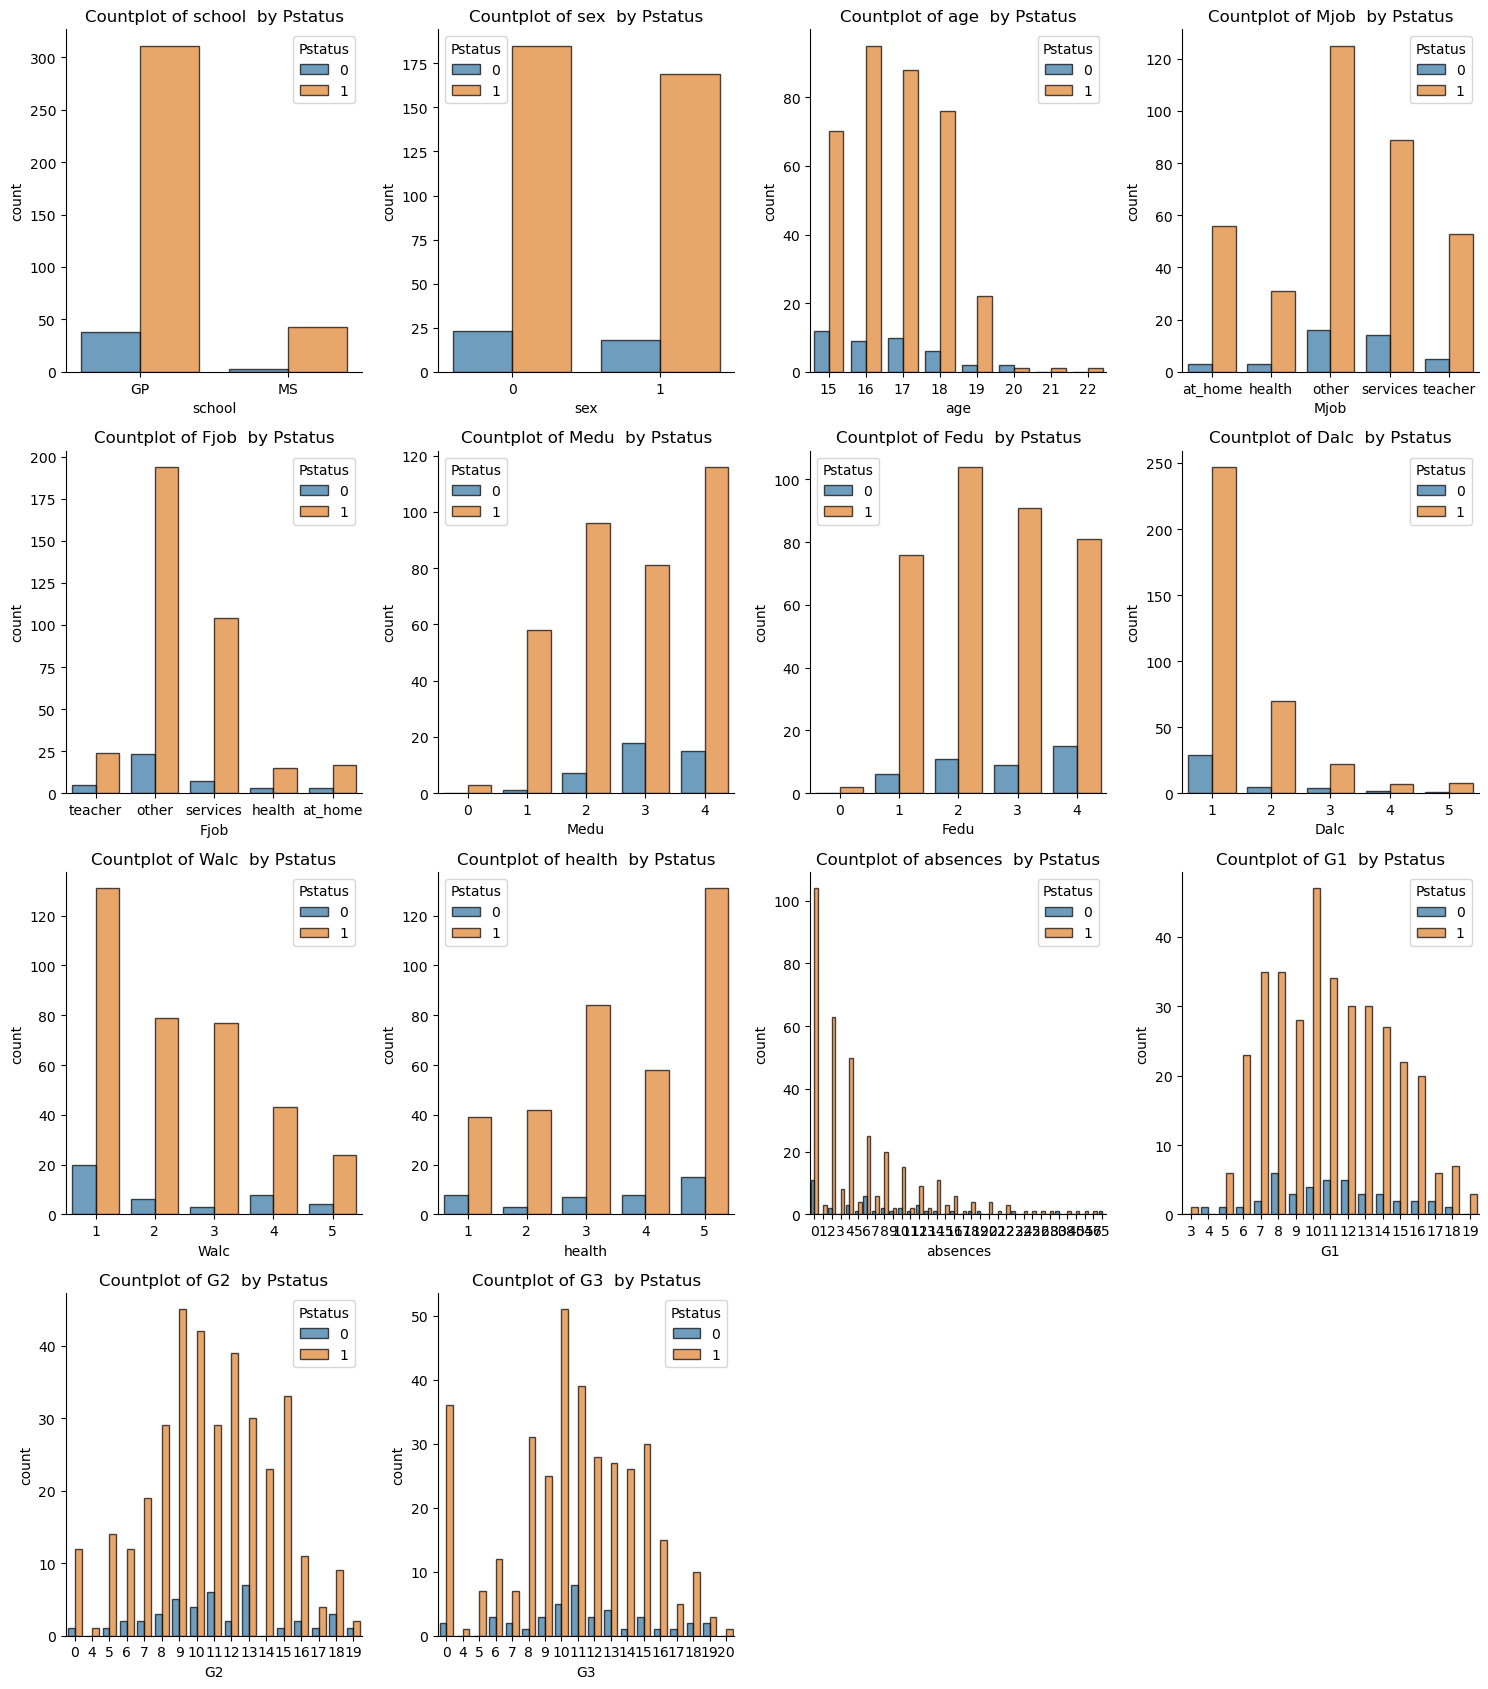

In [93]:
#столбчатые диаграммы отображающие частотность каждой категории по типу регрессора
plt.figure(figsize=[15,17])
fft=['school','sex','age','Mjob','Fjob','Medu','Fedu','Dalc','Walc','health','absences','G1','G2','G3']
n=1
for f in fft:
    plt.subplot(4,4,n)
    sns.countplot(x=f, hue='Pstatus', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by Pstatus".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [42]:
df = df.replace(to_replace=['M','F'], value=[1,0])


In [43]:
df = df.replace(to_replace=['yes','no'], value=[1,0])

In [44]:
df = df.replace(to_replace=['U','R'], value=[1,0])

In [45]:
df = df.replace(to_replace=['T','A'], value=[1,0])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,0,18,1,GT3,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,0,17,1,GT3,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,0,15,1,LE3,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,0,15,1,GT3,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,0,16,1,GT3,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,1,20,1,LE3,0,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,1,17,1,LE3,1,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,1,21,0,GT3,1,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,1,18,0,LE3,1,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Спецификация регрессии
$$
G3= \beta_0 + \beta_1*sex + \beta_2*age + \beta_3*studytime + \beta_4*internet + \beta_5*romantic + \beta_6*goout + \beta_7*Dalc
$$

In [47]:
price_eq = smf.ols(formula='G3~sex+age+studytime+internet+romantic+goout+Dalc', data=df).fit()
price_eq.params.round(3)

Intercept    16.130
sex           1.276
age          -0.396
studytime     0.701
internet      1.126
romantic     -1.078
goout        -0.499
Dalc         -0.111
dtype: float64

$$
G3= 16.130 + 1.276*sex + (-0.396)*age + 0.701*studytime + 1.126*internet + (-1.078)*romantic + (-0.499)*goout + (-0.111)*Dalc
$$

1. Если студент - парень, итоговая отметка увеличивается на **1.276** при прочих равных условиях;
2. При увеличении возраста на 1 единицу, итоговая отметка снижается на **0.396** при прочих равных условиях;
3. При увеличении времени затраченного на обучение в течение недели на 1-4 часа, итоговая отметка увеличивается на **0.701** при прочих равных условиях;
4. Наличие доступа в интернет повышает итоговую отметку на **1.126** при прочих равных условиях;
5. Наличие романтических отношений снижает итоговую отметку на **1.078** при прочих равных условиях;
6. Увеличение частоты прогулок с друзьями снижает итоговую отметку на **0.499** при прочих равных условиях;
7. Увеличение употребления алкоголя в день снижает итоговую отметку на **0.111** при прочих равных условиях.

## Зависимость итоговой отметки от пола

<Axes: xlabel='sex', ylabel='G3'>

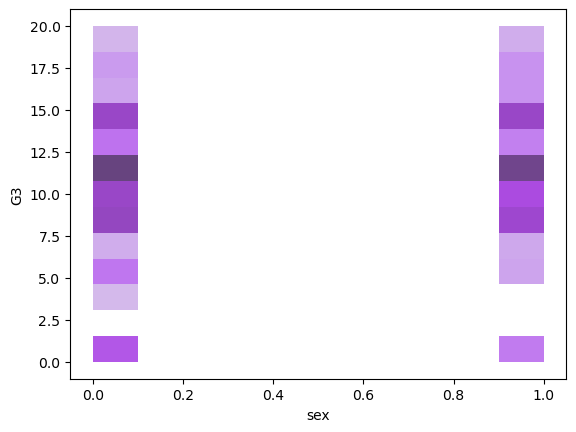

In [21]:
sns.histplot(data=df, x='sex', y='G3', color='darkorchid')

Столбчатая диаграмма показывает, что итоговые отметки студентов-парней выше.

## Зависимость итоговой отметки от возраста

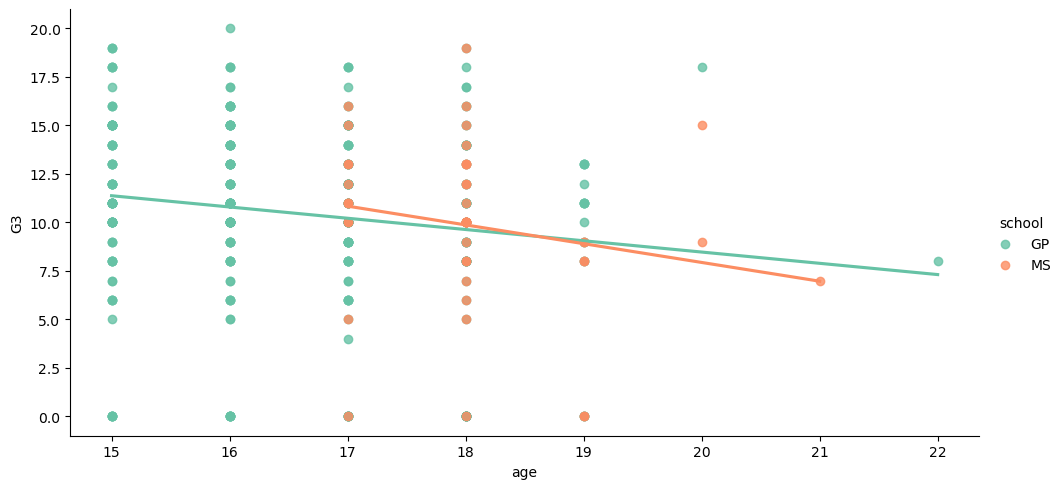

In [84]:
sns.lmplot (data = df, x = 'age', y = 'G3', ci=None, hue='school', height = 5, aspect = 2, palette="Set2")

Из графика следует, что с каждым годом итоговые отметки студентов обоих учебных заведений ухудшаются. При этом студенты GP имеют более высокие рейтинги.

<AxesSubplot:xlabel='age', ylabel='G3'>

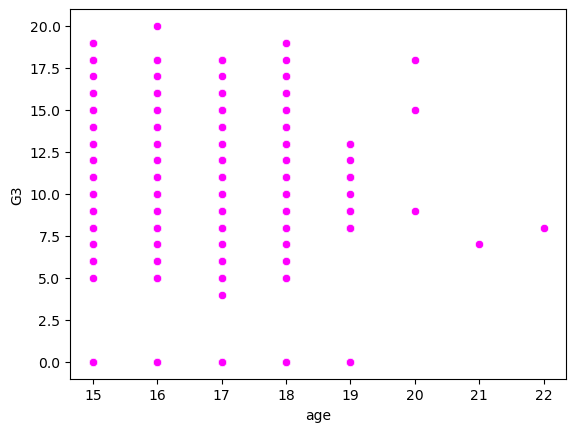

In [103]:
sns.scatterplot(data=df, y = 'G3', x = 'age', color="fuchsia" )

<AxesSubplot:xlabel='age', ylabel='G3'>

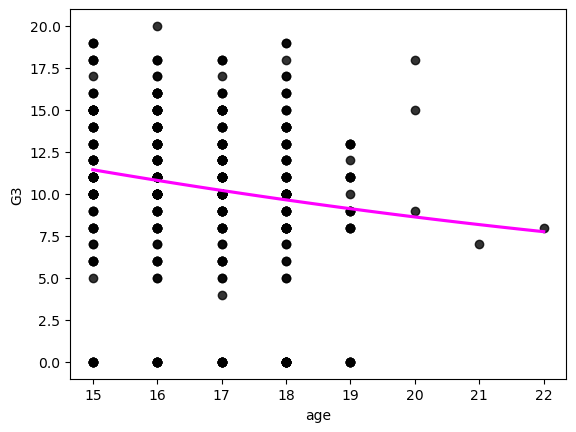

In [105]:
sns.regplot(data=df, y = 'G3', x = 'age', ci=None, order = 2, color="black", line_kws ={"color":"fuchsia"})

## Зависимость итоговой отметки от наличия романтических отношений

<AxesSubplot:xlabel='romantic', ylabel='G3'>

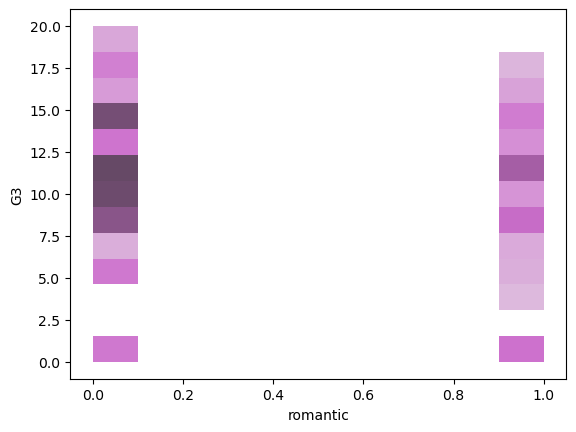

In [88]:
sns.histplot(data=df, x='romantic', y='G3', color='plum')

По данным столбчатой диаграммы можно судить о том, что при наличии романтических отношений итоговые отметки ниже, чем при их отсутствии. Максимальный балл, который получили студенты в отношениях - **18** из 20

## Зависимость итоговой отметки от частоты прогулок с друзьями

<AxesSubplot:xlabel='goout', ylabel='G3'>

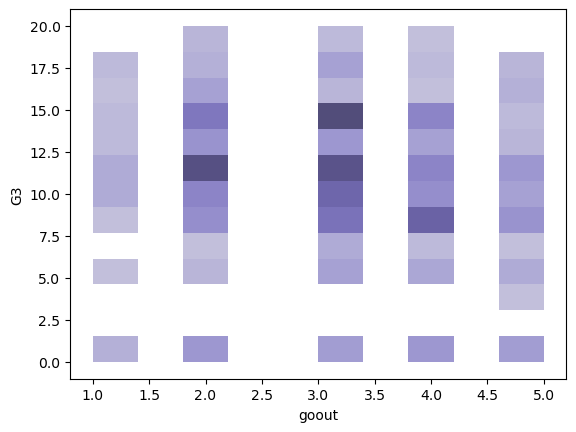

In [90]:
sns.histplot(data=df, x='goout', y='G3', color='darkslateblue')

Увеличение частоты прогулок с друзьями приводит к снижению итоговой отметки.

## Зависимость итоговой отметки от наличия интернета

<AxesSubplot:xlabel='internet', ylabel='G3'>

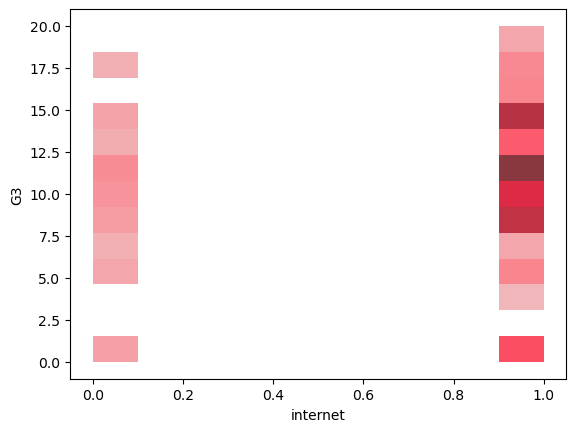

In [89]:
sns.histplot(data=df, x='internet', y='G3', color='crimson')

Столбчатая диаграмма показывает, что наличие интернета является необходимым условием более высоких отметок.

## Зависимость итоговой отметки от количества употребляемого в день алкоголя

<AxesSubplot:xlabel='Dalc', ylabel='G3'>

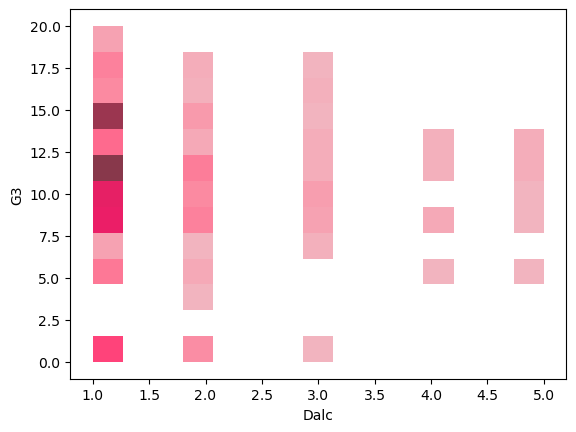

In [62]:
sns.histplot(data=df, x='Dalc', y='G3', color='pink')

Столбчатая диаграмма показывает, что по мере увеличения употребляемого в день количества алкоголя отметки студентов ухудшаются. При максимальном употреблении алкоголя в день максимальная отметка, которую может получить студент - **13-14** из 20.

## Распределение итоговых отметок

In [90]:
fig = px.histogram(df, x="G3",
                   nbins=20, histnorm=None,
                   marginal="box")
fig.show()

In [49]:
pd.DataFrame(df["G3"].describe()).round(2)

,G3
count,395.00
mean,10.42
std,4.58
min,0.00
25%,8.00
50%,11.00
75%,14.00
max,20.00


Гистограмма показывает нормальное распределение. 
Медиана находится на **11**, а большинство случаев итоговой отметки попадают в интервал от **10** до **14**.  
Медиана практически равна среднему значению (около **10,5**), а стандартное отклонение составляет около **4,6**

## Вычисляем TSS, ESS, RSS

In [106]:
# TSS
price_eq.centered_tss.round(3)

8269.909

In [107]:
# ESS
price_eq.ess.round(3)

707.703

In [108]:
# RSS
RSS=price_eq.ssr.round(3)
RSS

7562.206

$$
TSS=8269.909, ESS=707.703, RSS=7562.206
$$

In [110]:
# R^2
price_eq.rsquared.round(3)

0.086

$$
R^2 = 0.086
$$

In [113]:
n=395
k=7
s=np.sqrt(RSS/(n-k-1))
round(s,3)

4.42

$$
s=4.42
$$

In [114]:
# adj R^2
price_eq.rsquared_adj.round(3)

0.069

$$
R^2_{adj}= 0.069
$$

Коэффициент детерминации близок к **0**, что означает **низкую значимость модели**.

In [115]:
models = smf.ols(data=df, formula='G3~sex+age+studytime+internet+romantic+goout+Dalc').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     5.174
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.20e-05
Time:                        03:30:56   Log-Likelihood:                -1143.5
No. Observations:                 395   AIC:                             2303.
Df Residuals:                     387   BIC:                             2335.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1297      3.143      5.132      0.000       9.950      22.309
sex            1.2763      0.484      2.638      0.009       0.325       2.227
age           -0.3957      0.181     -2.182      0.030      -0.752      -0.039
studytime      0.7014      0.282      2.488      0.013       0.147       1.256
internet       1.1265      0.609      1.850      0.065      -0.070       2.323
romantic      -1.0785      0.484     -2.230      0.026      -2.029      -0.127
goout         -0.4993      0.209     -2.386      0.018      -0.911      -0.088
Dalc          -0.1112      0.272     -0.408      0.683      -0.647       0.424
==============================================================================
Omnibus:                       35.019   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.789
Skew:                          -0.755   Prob(JB):                     8.42e-10
Kurtosis:                       3.510   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
models = smf.ols(data=df, formula='G3~sex+age+studytime+internet+romantic+goout+Dalc').fit()
models.summary(alpha = 0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.1297,3.143,5.132,0.000,9.950,22.309
sex,1.2763,0.484,2.638,0.009,0.325,2.227
age,-0.3957,0.181,-2.182,0.030,-0.752,-0.039
studytime,0.7014,0.282,2.488,0.013,0.147,1.256
internet,1.1265,0.609,1.850,0.065,-0.070,2.323
romantic,-1.0785,0.484,-2.230,0.026,-2.029,-0.127
goout,-0.4993,0.209,-2.386,0.018,-0.911,-0.088
Dalc,-0.1112,0.272,-0.408,0.683,-0.647,0.424


In [132]:
data_string = '''coef std.err 
Intercept 16.1297 3.143 
sex 1.2763 0.484 
age -0.3957 0.181 
studytime 0.7014 0.282
internet 1.1265 0.609
romantic -1.0785 0.484
goout -0.4993 0.209
Dalc -0.1112 0.272
'''

In [133]:
df = pd.read_csv(io.StringIO(data_string), sep='\s+')
df

,coef,std.err
Intercept,16.1297,3.143
sex,1.2763,0.484
age,-0.3957,0.181
studytime,0.7014,0.282
internet,1.1265,0.609
romantic,-1.0785,0.484
goout,-0.4993,0.209
Dalc,-0.1112,0.272


In [134]:
df['t_nabl'] = df['coef']/df['std.err']
df

,coef,std.err,t_nabl
Intercept,16.1297,3.143,5.131944
sex,1.2763,0.484,2.636983
age,-0.3957,0.181,-2.186188
studytime,0.7014,0.282,2.487234
internet,1.1265,0.609,1.849754
romantic,-1.0785,0.484,-2.228306
goout,-0.4993,0.209,-2.388995
Dalc,-0.1112,0.272,-0.408824


In [135]:
t_cr = stats.t.ppf(1-0.05/2, 394 - (7+1))
t_cr

1.9661287528932412

$$
t_{cr}=1.966
$$

In [138]:
df['Znachimosty'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabl']) >t_cr else 'ne znachim', axis = 1)
df

,coef,std.err,t_nabl,Znachimosty
Intercept,16.1297,3.143,5.131944,znachim
sex,1.2763,0.484,2.636983,znachim
age,-0.3957,0.181,-2.186188,znachim
studytime,0.7014,0.282,2.487234,znachim
internet,1.1265,0.609,1.849754,ne znachim
romantic,-1.0785,0.484,-2.228306,znachim
goout,-0.4993,0.209,-2.388995,znachim
Dalc,-0.1112,0.272,-0.408824,ne znachim


## Вывод: 
Не все коэффициенты регрессии являются значимыми. 
Наличие доступа к интернету и количество употребляемого в день алкоголя **не значимы**.

# F-test

$$
H_0: \beta_{G3}=\beta_{studytime}=\beta_{freetime}=\beta_{absences}=\beta_{Walc}=0
$$
$$
H_1: \beta_{G3}^2+\beta_{studytime}^2+\beta_{freetime}^2+\beta_{failures}^2+\beta_{Walc}^2>0
$$

In [190]:
G3_df = pd.read_csv('https://raw.githubusercontent.com/EMR-Python/emr-hw-mgimomeo/main/student-mat.csv?token=GHSAT0AAAAAACCUKVKPG6WXVUVNSMNZN26CZDCWDFA')
G3_df
mod1 = smf.ols(formula='G3~studytime+freetime+failures+Walc', data=G3_df).fit()
summary_col(mod1, stars=True)

,G3
Intercept,9.9047***
,(1.0684)
studytime,0.2376
,(0.2702)
freetime,0.2297
,(0.2203)
failures,-2.2045***
,(0.2969)
Walc,0.0089
,(0.1753)


In [194]:
# критическое значение
f.ppf(q=1-0.05, dfn=4, dfd=mod1.df_resid)

2.394824200808201

### Регрессия значима

In [197]:
print( mod1.f_test('studytime=freetime=failures=Walc=0') )

<F test: F=15.042238324132505, p=1.9131583014223337e-11, df_denom=390, df_num=4>


$$
F_{nabl}>F{cr}; 
$$

## Вывод: 
Данные не согласуются с гипотезой H<sub>0</sub>

## Доверительные интервалы

In [230]:
date = '''
studytime 0.2376
(0.2702)
freetime 0.2297
(0.2203)
failures -2.2045***
(0.2969)
Walc 0.0089
(0.1753)
'''

In [231]:
np.reshape(date.strip().split(), (4,3) )

array([['studytime', '0.2376', '(0.2702)'],
       ['freetime', '0.2297', '(0.2203)'],
       ['failures', '-2.2045***', '(0.2969)'],
       ['Walc', '0.0089', '(0.1753)']], dtype='<U10')

In [232]:
df = pd.DataFrame(np.reshape(date.strip().split(), (4,3) ), columns=['Coeff','Est str','std.err. str'])
df

,Coeff,Est str,std.err. str
0,studytime,0.2376,(0.2702)
1,freetime,0.2297,(0.2203)
2,failures,-2.2045***,(0.2969)
3,Walc,0.0089,(0.1753)


In [233]:
df['Estimate'] = df['Est str'].str.extract(r'([-+]?\d+.\d+)').astype(float)
df['Std.error'] = df['std.err. str'].str.extract(r'([-+]?\d+.\d+)').astype(float)
df

,Coeff,Est str,std.err. str,Estimate,Std.error
0,studytime,0.2376,(0.2702),0.2376,0.2702
1,freetime,0.2297,(0.2203),0.2297,0.2203
2,failures,-2.2045***,(0.2969),-2.2045,0.2969
3,Walc,0.0089,(0.1753),0.0089,0.1753


In [234]:
df['lower'] = (df['Estimate'] - df['Std.error']*t_cr).round(2)
df['upper'] = (df['Estimate'] + df['Std.error']*t_cr).round(2)
df

,Coeff,Est str,std.err. str,Estimate,Std.error,lower,upper
0,studytime,0.2376,(0.2702),0.2376,0.2702,-0.21,0.68
1,freetime,0.2297,(0.2203),0.2297,0.2203,-0.13,0.59
2,failures,-2.2045***,(0.2969),-2.2045,0.2969,-2.69,-1.72
3,Walc,0.0089,(0.1753),0.0089,0.1753,-0.28,0.30


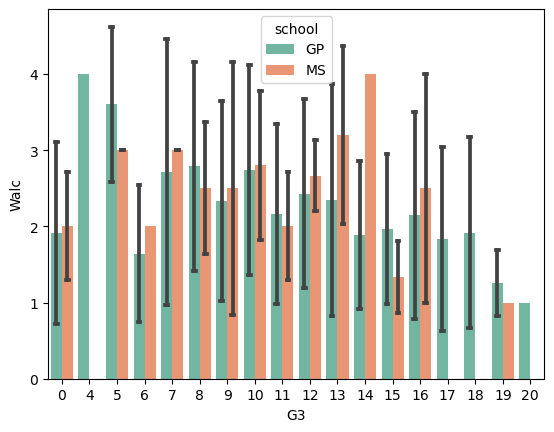

In [243]:
sns.barplot(
    x="G3", 
    y="Walc", 
    hue="school", 
    ci="sd", 
    capsize=0.1,
    data= G3_df,
palette="Set2");


## Прогнозирование

In [260]:
G3_df = pd.read_csv('https://raw.githubusercontent.com/EMR-Python/emr-hw-mgimomeo/main/student-mat.csv?token=GHSAT0AAAAAACCUKVKPW23E7GE377QIFILQZDC2MOA')
G3_df
mod1 = smf.ols(formula='G3~studytime+freetime+failures+Walc', data=G3_df).fit()
mod1.params

Intercept    9.904652
studytime    0.237584
freetime     0.229724
failures    -2.204457
Walc         0.008891
dtype: float64

In [261]:
new_df = pd.DataFrame( { 'studytime': [2, 2, 2], 'freetime': [3, 3, 3], 
                        'failures': [0, 0, 3], 'Walc': [1, 1, 3]} )
new_df

,studytime,freetime,failures,Walc
0,2,3,0,1
1,2,3,0,1
2,2,3,3,3


In [262]:
mod1.predict(exog=new_df, transform=True)

0    11.077882
1    11.077882
2     4.482292
dtype: float64

## Вывод: 
Был произведено прогнозирование итоговой отметки 3 студентов в зависимости от выбранных характеристик. 

## Мультиколлинеарность

In [272]:
model__1 = smf.ols(data = G3_df , formula = 'G3~studytime+freetime+failures+Walc').fit()
model__2 = smf.ols(data = G3_df , formula = 'Walc~studytime+freetime+failures+G3').fit()
model__3 = smf.ols(data = G3_df , formula = 'freetime~studytime+G3+failures+Walc').fit()
model__1.params.round(3)

Intercept    9.905
studytime    0.238
freetime     0.230
failures    -2.204
Walc         0.009
dtype: float64

In [273]:
model__2.params.round(3)

Intercept    2.476
studytime   -0.341
freetime     0.138
failures     0.164
G3           0.001
dtype: float64

In [274]:
model__3.params.round(3)

Intercept    3.133
studytime   -0.127
G3           0.012
failures     0.104
Walc         0.087
dtype: float64

In [275]:
model.params

Intercept    9.904652
studytime    0.237584
freetime     0.229724
failures    -2.204457
Walc         0.008891
dtype: float64

In [276]:
model.rsquared

0.13365860274441477

In [277]:
VIF_1 = 1/(1 - model__1.rsquared.round(3))
VIF_1.round(3)

1.155

In [278]:
VIF_1 = 1/(1 - model__2.rsquared.round(3))
VIF_1.round(3)

1.094

In [279]:
VIF_1 = 1/(1 - model__3.rsquared.round(3))
VIF_1.round(3)

1.042

In [286]:
G3_df = pd.read_csv('https://raw.githubusercontent.com/EMR-Python/emr-hw-mgimomeo/main/student-mat.csv?token=GHSAT0AAAAAACCUKVKOPDTGCG4DWXGWRHWUZDC3DKQ')
G3_df
specification = 'G3~studytime+freetime+failures+Walc'
mod = smf.ols(formula=specification, data=G3_df).fit()
summary_params(mod)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,9.904652,1.068367,9.270832,1.277426e-18,7.804173,12.005131
studytime,0.237584,0.270181,0.879350,3.797530e-01,-0.293610,0.768778
freetime,0.229724,0.220290,1.042825,2.976752e-01,-0.203381,0.662828
failures,-2.204457,0.296904,-7.424826,7.164812e-13,-2.788189,-1.620726
Walc,0.008891,0.175328,0.050710,9.595825e-01,-0.335815,0.353597


In [287]:
y, X = patsy.dmatrices(specification, G3_df, return_type='dataframe')
X.head()

,Intercept,studytime,freetime,failures,Walc
0,1.0,2.0,3.0,0.0,1.0
1,1.0,2.0,3.0,0.0,1.0
2,1.0,2.0,3.0,3.0,3.0
3,1.0,3.0,2.0,0.0,1.0
4,1.0,2.0,3.0,0.0,2.0


In [288]:
X.drop(labels='Intercept', axis=1).corr().round(3)

,studytime,freetime,failures,Walc
studytime,1.000,-0.143,-0.174,-0.254
freetime,-0.143,1.000,0.092,0.148
failures,-0.174,0.092,1.000,0.142
Walc,-0.254,0.148,0.142,1.000


<AxesSubplot:>

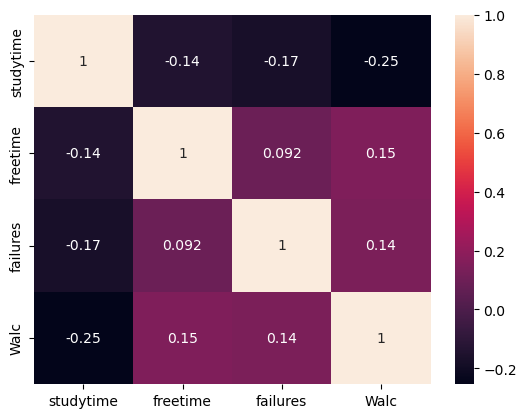

In [289]:
sns.heatmap(X.drop(labels='Intercept', axis=1).corr(), annot=True)

## Вывод: 
**Слабая** корреляцая между регрессорами. 


C:\Users\biblioreader\AppData\Local\Temp\ipykernel_3008\1430593888.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 [Text(0, 0.5, 'sex'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'address'),
  Text(0, 3.5, 'Pstatus'),
  Text(0, 4.5, 'Medu'),
  Text(0, 5.5, 'Fedu'),
  Text(0, 6.5, 'traveltime'),
  Text(0, 7.5, 'studytime'),
  Text(0, 8.5, 'failures'),
  Text(0, 9.5, 'schoolsup'),
  Text(0, 10.5, 'famsup'),
  Text(0, 11.5, 'paid'),
  Text(0, 12.5, 'activities'),
  Text(0, 13.5, 'nursery'),
  Text(0, 14.5, 'higher'),
  Text(0, 15.5, 'internet'),
  Text(0, 16.5, 'romantic'),
  Text(0, 17.5, 'famrel'),
  Text(0, 18.5, 'freetime'),
  Text(0, 19.5, 'goout'),
  Text(0, 20.5, 'Dalc'),
  Text(0, 21.5, 'Walc'),
  Text(0, 22.5, 'health'),
  Text(0, 23.5, 'absences'),
  Text(0, 24.5, 'G1'),
  Text(0, 25.5, 'G2'),
  Text(0, 26.5, 'G3')])

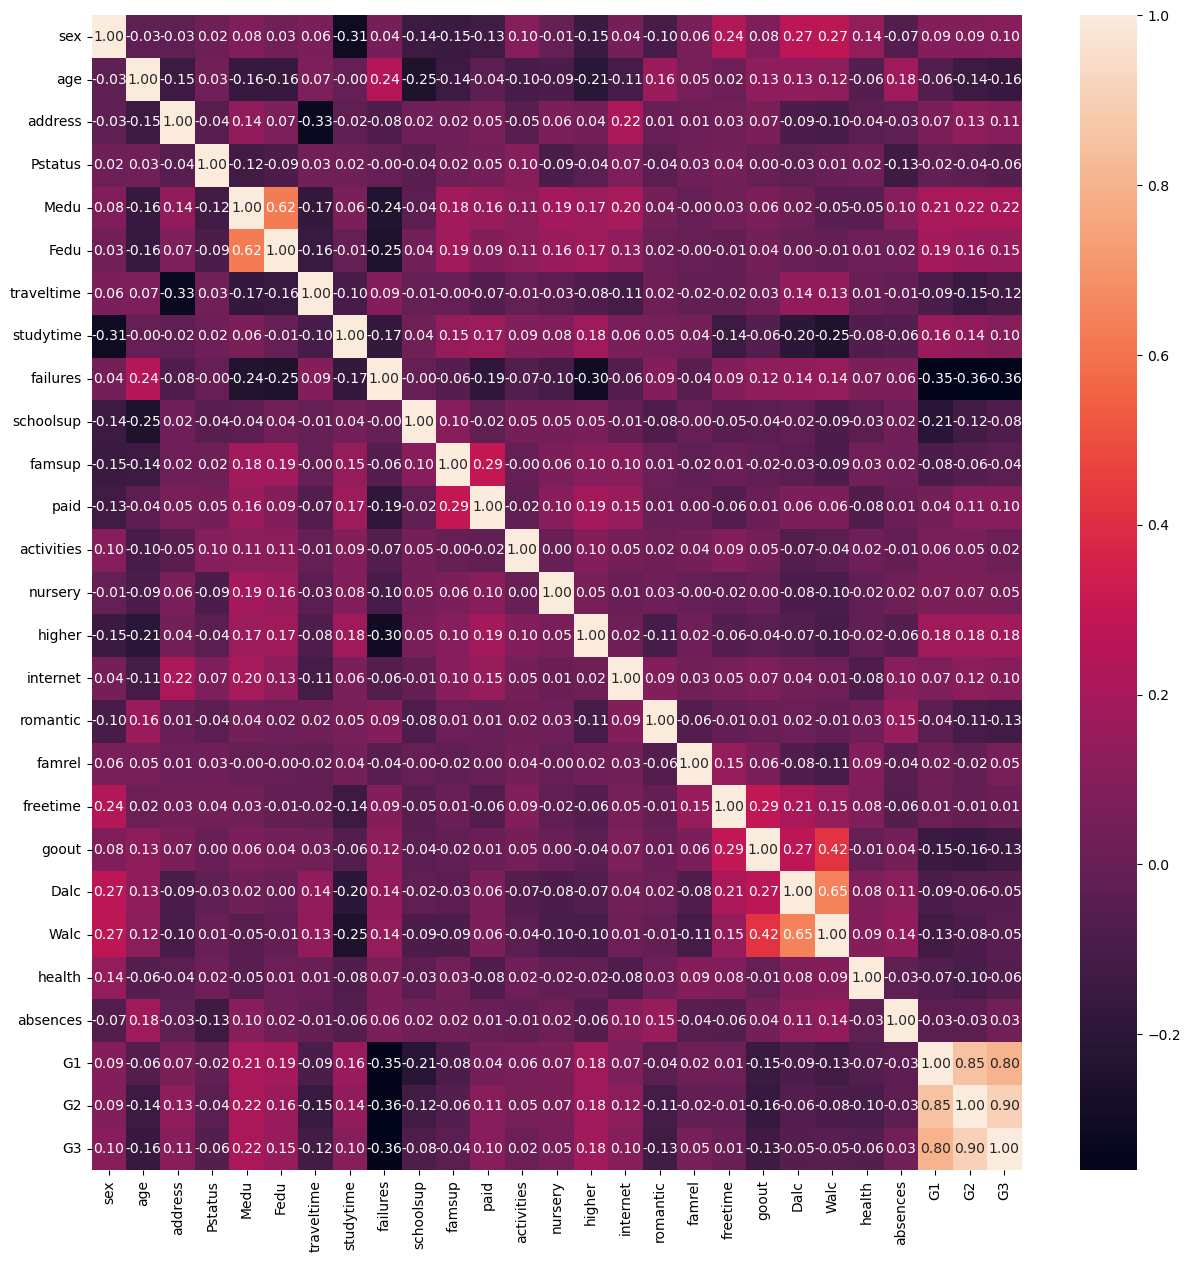

In [97]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

**Сильная** корреляция наблюдается между отметками за 1 и 2 семестр и итоговой отмекой.

## Дамми-переменные

$$
H_0: \beta_{age}=\beta_{reason_1}=\beta_{reason_2}=\beta_{reason_3}=0
$$
$$
H_1: \beta_{age}^2+\beta_{reason_1}^2+\beta_{reason_2}^2+\beta_{reason_3}^2>0
$$

In [4]:
G3_df = pd.read_csv('https://raw.githubusercontent.com/EMR-Python/emr-hw-mgimomeo/main/student-mat.csv?token=GHSAT0AAAAAACCWHWYDZNX6QWY2LGWHKMPUZDC7HSA')
G3_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [302]:
G3_df.value_counts(subset='reason')

reason
course        145
home          109
reputation    105
other          36
dtype: int64

In [5]:
G3_df.value_counts(subset='Fjob')

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
dtype: int64

<AxesSubplot:xlabel='Fjob', ylabel='count'>

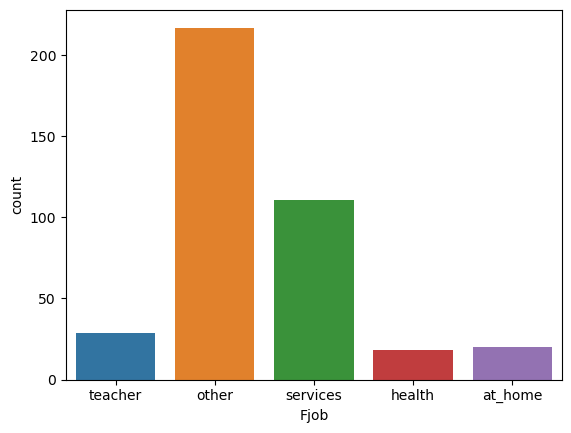

In [7]:
sns.countplot(data=G3_df, x='Fjob')

In [320]:
mod = smf.ols(formula='np.log(age)~C(reason)+C(Fjob)', data=G3_df).fit()
mod.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(age)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
No. Observations:                 395   F-statistic:                    0.1857
Covariance Type:            nonrobust   Prob (F-statistic):              0.906
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.8120      0.006    446.734      0.000       2.800       2.824
C(reason)[T.home]           0.0027      0.010      0.280      0.779      -0.016       0.022
C(reason)[T.other]          0.0058      0.014      0.413      0.680      -0.022       0.034
C(reason)[T.reputation]    -0.0034      0.010     -0.354      0.724      -0.023       0.016
===========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
mod.f_test('C(reason)[T.home]=C(reason)[T.other]=C(reason)[T.reputation]=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.18567622654774943, p=0.9061243475599927, df_denom=391, df_num=3>

In [316]:
# критическое значение
f.ppf(q=1-0.05, dfn=3, dfd=mod1.df_resid)

2.62778925254519

$$
F_{nabl}<F{cr}; 
$$

## Вывод: 
Данные **согласуются** с гипотезой H<sub>0</sub>. Нет оснований отвергать гипотезу H<sub>0</sub>.

## Гетероскедастичность

$$
H_0: \gamma_{1}=\gamma_{2}=\gamma_{3}=\gamma_{4}=\gamma_{5}=0
$$
$$
H_1: \gamma_{1}^2+\gamma_{2}^2+\gamma_{3}^2+\gamma_{4}^2+\gamma_{5}^2≠0
$$

In [55]:
G3_df = pd.read_csv('https://raw.githubusercontent.com/EMR-Python/emr-hw-mgimomeo/main/student-mat.csv?token=GHSAT0AAAAAACCWQRCAD3QIKLTAFR2EKG6SZDDIKJQ')
mod = smf.ols(formula='G3~studytime+freetime+failures+Walc', data=G3_df).fit()
mod.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.125
No. Observations:                 395   F-statistic:                     15.04
Covariance Type:            nonrobust   Prob (F-statistic):           1.91e-11
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9047      1.068      9.271      0.000       7.804      12.005
studytime      0.2376      0.270      0.879      0.380      -0.294       0.769
freetime       0.2297      0.220      1.043      0.298      -0.203       0.663
failures      -2.2045      0.297     -7.425      0.000      -2.788      -1.621
Walc           0.0089      0.175      0.051      0.960      -0.336       0.354
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
mod.model.exog

array([[1., 2., 3., 0., 1.],
       [1., 2., 3., 0., 1.],
       [1., 2., 3., 3., 3.],
       ...,
       [1., 1., 5., 3., 3.],
       [1., 1., 4., 0., 4.],
       [1., 1., 2., 0., 3.]])

In [59]:
BP_stat, p_val, F_stat, p_val_F = sms.het_breuschpagan(resid=mod.resid, exog_het=mod.model.exog)
BP_stat, p_val

(12.355957542966486, 0.014891556027963233)

In [60]:
chi2.ppf(q=1-0.5, df=mod.df_model)

3.3566939800333224

$$
p-value < α; 
$$

## Вывод:
Тест указывает на гетероскедастичность. **H<sub>0</sub> отвергается.**

## Серийная корреляция

$$
H_0:p = 0
$$
$$
H_1:p ≠ 0
$$

In [86]:
mod = smf.ols(data=G3_df, formula='G3~studytime+freetime+failures+Walc').fit()
mod.params.round(2)

Intercept    9.90
studytime    0.24
freetime     0.23
failures    -2.20
Walc         0.01
dtype: float64

In [87]:
resSq = sum(mod.resid**2)

In [88]:
sum_resid = 0
for i in range(len(mod.resid)-1):
    sum_resid+=(mod.resid[i+1]-mod.resid[i])**2
sum_resid

14541.666652931892

In [89]:
sum_resid/resSq

2.029665147233438

## Вывод:
**H<sub>0</sub> отвергается.**